Pois categories:
- entertainment
- catering
- service
- office
- leisure
- public transport

Nodes features:
- crosswalk
- walk light
- round-about
- walk light duration
- street width
- tactile paving

Edges features:
- work in progress
- bike lane
- uphill
- surface
- one way
- tactile paving
- stairs

Pois features:
- wheelchair accessible
- tactile paving
- tactile map
- reception
- stairs

In [71]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import json

In [72]:
!python3.8 format.py --name "New York" --n1 "(3, 40.74605893499274, -73.99053528624474)" --d_m 79

Meters per pixel: 0.6183017793539175
Could not find edge for Sushi Ginza Onodera
Could not find edge for Pig 'N' Whistle On 36th
Could not find edge for Calle Dao
Could not find edge for Mulberry & Vine
Could not find edge for The Redbury New York


In [73]:
def distance(p1, p2):
    return ((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)**0.5

def get_label(name: str):
    name.replace("-", " ")
    name.replace("_", " ")

    label = ""
    for word in name.split(" "):
        if len(word) > 2 and word[:-2].isnumeric():
            label += word[:-2]
        else: label += word[0]
    return label

def get_contrasting_color(color):
    rgb = mcolors.to_rgb(color)
    brightness = 0.299 * rgb[0] + 0.587 * rgb[1] + 0.114 * rgb[2]
    return 'white' if brightness < 0.5 else 'black'

In [74]:
G = nx.Graph()

with open('out/nodes.json') as f:
    nodes = json.load(f)

for i, node in enumerate(nodes):
    G.add_node(i, pos=(node[0], node[1]))

with open('out/edges.json') as f:
    edges = json.load(f)

with open('out/streets.json', 'r') as f:
    streets = json.load(f)

for street, street_edges in streets.items():
    for edge_index in street_edges:
        edge = edges[edge_index]

        n1 = G.nodes[edge[0]]['pos']
        n2 = G.nodes[edge[1]]['pos']
        dist = distance(n1, n2)
        G.add_edge(edge[0], edge[1], weight=dist, street=street)

with open('out/pois.json') as f:
    pois = json.load(f)
    pois.sort(key=lambda x: get_label(x['name']))

print(f"PoIs found: {len(pois)}")

PoIs found: 81


In [75]:
# pois = list(filter(lambda x: "bus_stop" in x['categories'], pois))

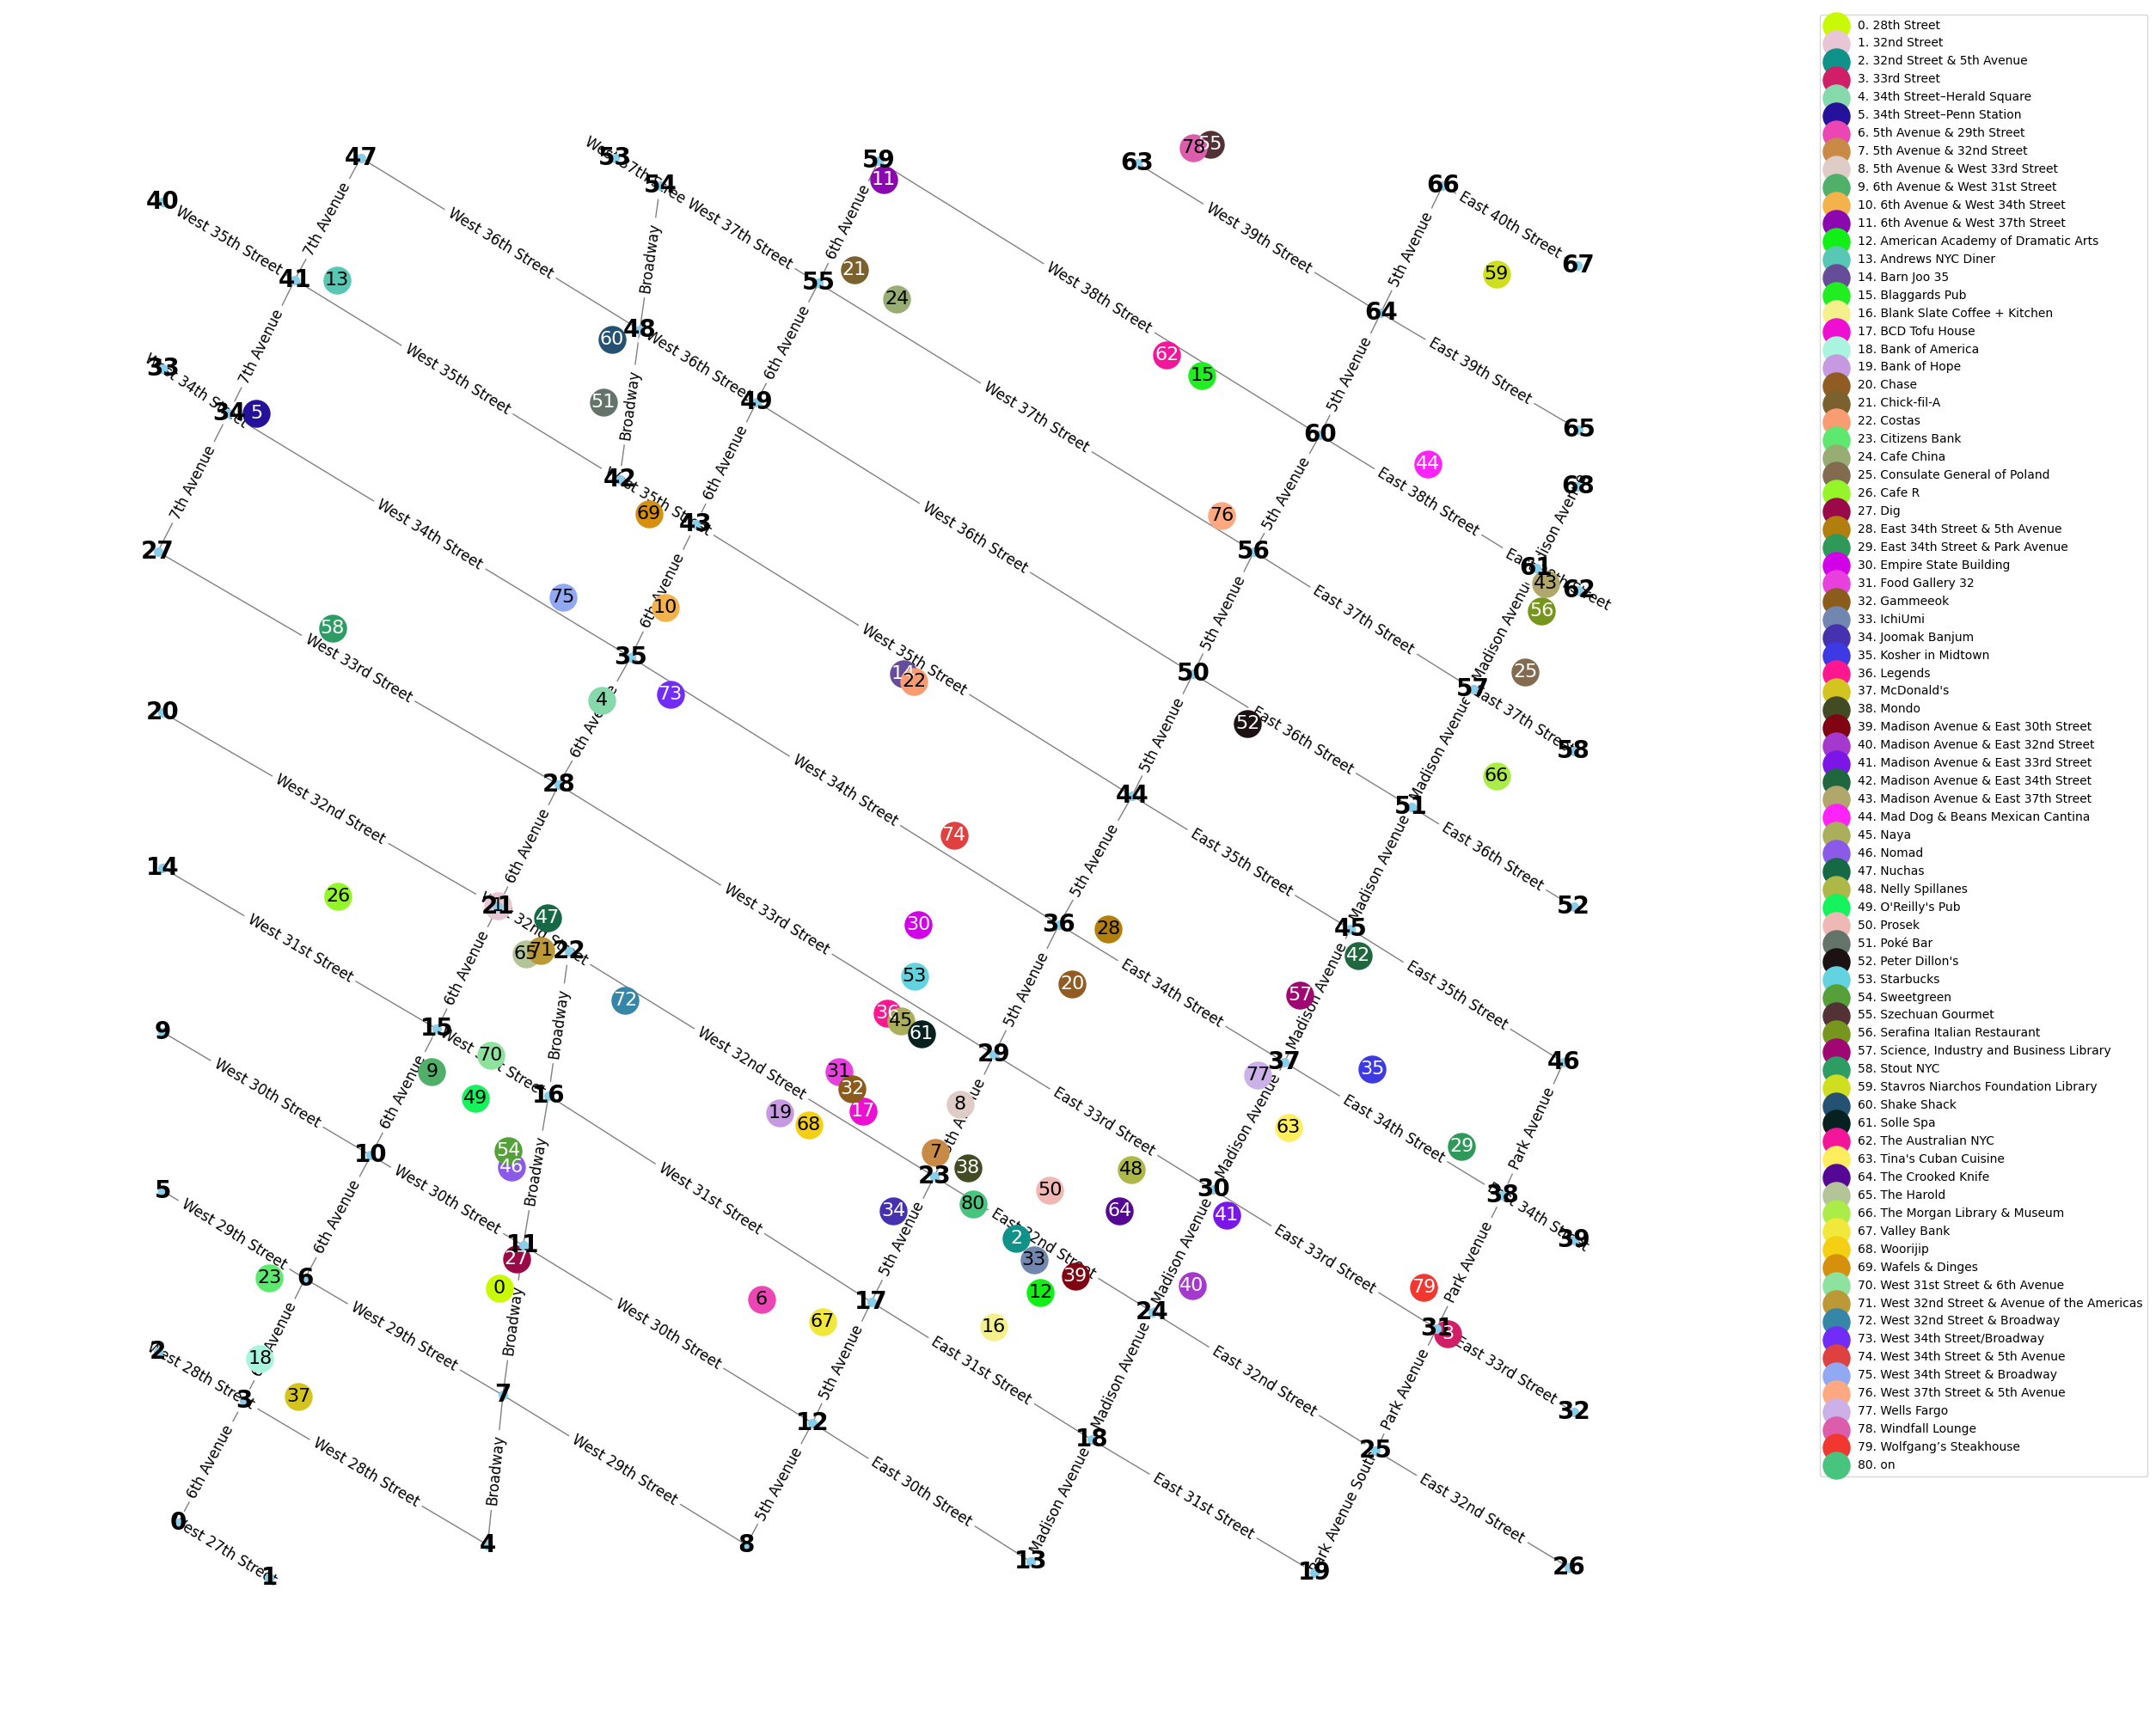

In [76]:
pos = nx.get_node_attributes(G, "pos")

plt.figure(figsize=(20, 20))

nx.draw(
    G,
    pos,
    with_labels=True,
    node_size=50,
    node_color="skyblue",
    font_size=20,
    font_color="black",
    font_weight="bold",
    edge_color="gray",
)

labels = nx.get_edge_attributes(G, "street")
#labels = {k: round(v, 2) for k, v in labels.items()}
#labels = {k: get_label(v) for k, v in labels.items()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=12)

colors = np.random.rand(len(pois), 3)
for i, poi in enumerate(pois):
    coords = poi["coords"]
    dot = plt.scatter(
        coords[0], coords[1], color=colors[i], s=500, label=f"{i}. {poi['name']}"
    )
    text_color = get_contrasting_color(colors[i])
    plt.text(coords[0], coords[1], i, fontsize=16, c=text_color, ha="center", va="center")

plt.gca().invert_yaxis()
plt.gcf().set_size_inches(20, 20)

plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.savefig("out/plot.png", format="png", dpi=300, bbox_inches="tight")
plt.show()

In [77]:
with open('out/pois.json', 'r') as f:
    p = json.load(f)
p[41]

{'name': 'Madison Avenue & East 34th Street',
 'bus_lines': ['19'],
 'city': 'New York',
 'district': 'Manhattan Community Board 6',
 'suburb': 'Manhattan',
 'street': 'Madison Avenue',
 'categories': ['bus_stop', 'public_transport'],
 'accessibility': {'wheelchair_accessible': True,
  'tactile_paving': False,
  'tactile_map': False,
  'reception': False,
  'stairs': False},
 'coords': [898.4305478859114, 642.3270499109316],
 'edge': 61}